In [1]:
# Import all dependencies
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv file
df=pd.read_csv('archive/dataset_phishing.csv')

# Show all columns 
pd.set_option('display.max_columns', None)

## Before we begin exploring the data, let's quickly analyze some important factors of the data

### Let's label legitimate = 1 and phishing = 0

In [3]:
# Re-run above code to run this cell
# Encoding 'status' as label 1 & 0, naming the field as target
df['status'] = df['status'].str.contains('legitimate').astype(int)
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.00,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,0,1,0,45,-1,0,1,1,4,1
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.00,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.000000,0,0,0,1,0,0,77,5767,0,0,1,2,0
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.000000,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.40,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.000000,0,0,0,1,0,0,14,4004,5828815,0,1,0,0
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.00,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.500000,0,0,0,1,0,0,62,-1,107721,0,0,3,1
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.00,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.000000,0,0,0,0,1,0,224,8175,8725,0,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,4,4,3,3,8,11,9,11,7.750000,6.00,9.500000,0,0,0,0,0,0,199,0.884422,0.115578,0,0,0,0.043478,0,0.173913,0,1,80.000000,0,21.052632,78.947368,0,0,0,0.000000,0,0,0,0,0,0,448,5396,3980,0,0,6,1
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,1,0,0,1,5,0,1,0,0,0,1,1,1,0,0,1,0.023810,0.000000,0,0,1,0,0,3,0,0,0,0,1,0,12,3,3,3,3,10,10,8,5.166667,6.50,4.900000,0,0,0,0,0,0,3,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,0,0,211,6728,0,0,1,0,0
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,1,1,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0.142857,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,13,5,1,3,1,15,8,15

#### The following code will verify that there are exactly 50% phishing URLs and 50% legitimate URLs - it will separate only the status and URL in one csv file

In [4]:
function_df = df[['url','status']]
function_df.head()

,url,status
0,http://www.crestonwood.com/router.php,1
1,http://shadetreetechnology.com/V4/validation/a...,0
2,https://support-appleld.com.secureupdate.duila...,0
3,http://rgipt.ac.in,1
4,http://www.iracing.com/tracks/gateway-motorspo...,1


### We save this CSV to be our function.csv file

In [5]:
function_df.to_csv("archive/function.csv",index=False,encoding='UTF-8')

In [6]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,1
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,0
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,0
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,1
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,1


In [7]:
legitimate_list = list(df[df.status == 1].url) 

In [8]:
phishing_list = list(df[df.status == 0].url) 

### We create a Dataframe below that separates the Phishing URLs and puts them in one column; then puts all the Legitimate URLs and puts them in another column

In [9]:
pd.DataFrame({'Phishing':phishing_list, 'Legitimate':legitimate_list})

,Phishing,Legitimate
0,http://shadetreetechnology.com/V4/validation/a...,http://www.crestonwood.com/router.php
1,https://support-appleld.com.secureupdate.duila...,http://rgipt.ac.in
2,http://appleid.apple.com-app.es/,http://www.iracing.com/tracks/gateway-motorspo...
3,http://www.shadetreetechnology.com/V4/validati...,http://www.mutuo.it
4,http://html.house/l7ceeid6.html,http://vamoaestudiarmedicina.blogspot.com/
...,...,...
5710,http://www.heinzreber.net/homeflash1.html,http://sheetdownload.com/
5711,http://www.peoplemakingplaces.com/includes/Sup...,http://www.answers.com/Q/What_are_the_sizes_of...
5712,http://www.dmega.co.kr/dmega/data/qna/sec/page...,http://www.fontspace.com/category/blackletter
5713,http://www.budgetbots.com/server.php/Server%20...,https://www.facebook.com/Interactive-Televisio...


### We are dropping the 'url' column so all of our data are numeric

In [10]:
# Drop url column
df = df.drop(columns = ['url'])
df

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.00,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,0,1,0,45,-1,0,1,1,4,1
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.00,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.000000,0,0,0,1,0,0,77,5767,0,0,1,2,0
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.000000,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.40,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.000000,0,0,0,1,0,0,14,4004,5828815,0,1,0,0
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.00,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.500000,0,0,0,1,0,0,62,-1,107721,0,0,3,1
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.00,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.000000,0,0,0,0,1,0,224,8175,8725,0,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,4,4,3,3,8,11,9,11,7.750000,6.00,9.500000,0,0,0,0,0,0,199,0.884422,0.115578,0,0,0,0.043478,0,0.173913,0,1,80.000000,0,21.052632,78.947368,0,0,0,0.000000,0,0,0,0,0,0,448,5396,3980,0,0,6,1
11426,84,18,0,5,0,1,1,0,0,1,0,0,1,5,0,1,0,0,0,1,1,1,0,0,1,0.023810,0.000000,0,0,1,0,0,3,0,0,0,0,1,0,12,3,3,3,3,10,10,8,5.166667,6.50,4.900000,0,0,0,0,0,0,3,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,0,0,211,6728,0,0,1,0,0
11427,105,16,1,2,6,0,1,0,0,1,1,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0.142857,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,13,5,1,3,1,15,8,15,6.153846,5.50,6.272727,0,1,0,0,0,0,68,0.470588,0.529412,0,5,0,0.000000,0,0.000000,0,1,6.250000,0,0.000000,0.000000,0,0,0,80.000000,0,0,0,0,0,0,2809,8515,8,0,1,10,1
11428,38,30,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,22,22,0,12.500000,12.50,0.000000,0,0,0,0,0,0,32,0.375000,0.625000,0,1,0,0.050000,0,0.0

## Save the dataset for ML use, comes later in the code

In [11]:
df.to_csv("archive/dataset_phishing_functionapplied.csv",index=False,encoding='UTF-8')

# Exploring the dataset

In [12]:
# Print the number of rows and columns
print("Number of rows: ",df.shape[0]) 
print("Number of columns: ", df.shape[1])

Number of rows:  11430
Number of columns:  88


In [13]:
# printing the first 5 rows.
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,1
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,0
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,0
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,1
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,1


In [14]:
#getting info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_or                       11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

In [15]:
# Looking for null values
df.isna().sum().sort_values(ascending=False)

length_url              0
length_hostname         0
ratio_extErrors         0
ratio_intErrors         0
ratio_extRedirection    0
                       ..
punycode                0
ratio_digits_host       0
ratio_digits_url        0
https_token             0
status                  0
Length: 88, dtype: int64

### Observation: The dataset has no missing values. All columns are numeric and either integers or float. Result: No cleaning of missing data needed and data types look correct.

### Looking for Duplicated Values

In [16]:
# Identifying duplicate columns

duplicates = df.duplicated().sort_values(ascending=False)
print(duplicates)

6459      True
8345      True
11217     True
9414      True
3771      True
         ...  
3825     False
3826     False
3827     False
3828     False
11429    False
Length: 11430, dtype: bool


In [17]:
# Get duplicate rows

duplicates = df.duplicated()
df[duplicates]
print("Number of duplicated rows: ", df[duplicates].shape[0])

Number of duplicated rows:  174


In [18]:
# Printing duplicates values 

df[duplicates].to_excel(r'archive/duplicates.xlsx')

In [19]:
# Deleting all duplicated values

cleaned_data= df.drop_duplicates()

In [20]:
# Checking again if any duplicate values still exist.
check = cleaned_data.duplicated()
cleaned_data[check]

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status


### Observation: The dataset contained 174 duplicated rows. All duplicates were removed from the source dataset. The new dataframe without duplicate values is called "cleaned_data".

### Exploring summary statistics:

In [21]:
#Show statistics 

cleaned_data.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.0,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.0,11256.000000,11256.0,11256.000000,11256.0,11256.000000,11256.000000,11256.000000,11256.000000,11256.0,11256.000000,11256.000000,11256.0,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,11256.000000,1.125600e+04,11256.000000,11256.000000,11256.000000,11256.000000
mean,61.235519,21.003376,0.149431,2.481077,1.007018,0.022388,0.141258,0.160270,0.0,0.291933,0.324005,0.006752,0.125000,4.301439,0.000711,1.028340,0.003731,0.061389,0.001955,0.035359,0.453980,0.127843,0.006663,0.016880,0.609630,0.052691,0.024245,0.000355,0.002399,0.066276,0.048685,0.020434,2.231787,0.201848,0.083866,0.119314,0.000178,0.494670,0.003109,6.251866,2.950604,3.107676,5.001155,2.414090,15.408937,10.453625,10.611496,7.242336,7.660230,5.116769,0.329069,0.100213,0.004176,0.004975,0.017946,0.060146,88.199982,0.605315,0.273683,0.0,0.786869,0.0,0.156805,0.0,0.060780,0.063699,0.441276,52.199846,0.0,43.184873,23.384068,0.0,0.001333,0.006130,37.202362,0.001155,0.001421,0.125355,0.774165,0.442608,0.073294,495.851635,4055.653252,8.562753e+05,0.019989,0.527097,3.188344,0.507729
std,55.526558,10.739101,0.356529,1.375096,2.100125,0.156130,0.364751,0.816036,0.0,0.997229,1.099063,0.081896,1.477662,1.881997,0.026651,0.242151,0.096975,0.586126,0.077704,0.378443,0.502518,0.379276,0.081359,0.170398,0.487855,0.089383,0.092296,0.018849,0.048920,0.248775,0.215219,0.141484,0.638208,0.401397,0.277200,0.324172,0.013329,0.689818,0.055678,5.586149,4.796791,2.193150,3.928062,3.011144,22.208584,4.926558,23.193778,4.151879,3.560924,7.177340,0.843778,0.300297,0.064486,0.070362,0.132761,0.332229,167.818628,0.374525,0.316444,0.0,2.767131,0.0,0.263322,0.0,0.153164,0.244227,0.496562,41.386736,0.0,46.263711,38.448800,0.0,0.036482,0.078058,39.063389,0.033966,0.037677,0.331136,0.418150,0.496717,0.260630,819.122928,3111.284320,1.994625e+06,0.139970,0.499287,2.538705,0.499962
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0

### Observation: 
length_url, length_hostname, nb_dots, nb_hyphens, nb_and, nb_eq,nb_underscore,nb_percent, nb_slash, nb_semicolumn, nb_space, length_words_raw, char_repeat, shortest_words_raw, shortest_word_host, shortest_word_path,	longest_words_raw, longest_word_host, longest_word_path, avg_words_raw,	avg_word_host, avg_word_pat, phish_hints, np_hyperlinks, nb_extCSS, domain_registration_length, page_rank,have high max_values relative to the percentiles. 
domain_registration_length and domain_age have negative values.


### Exploratory Data Analysis

#### Analyzing length_url

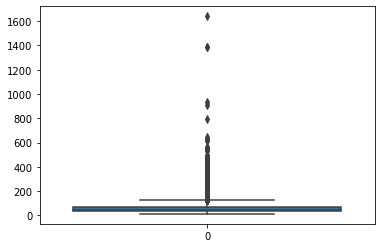

In [22]:
# Visualizing outliers with a Boxplot

URL_length = cleaned_data['length_url']
sns.boxplot(data=URL_length)
plt.show()

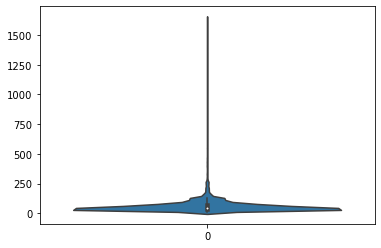

In [23]:
# Visualizing distribution with a Violinplot

URL_length = cleaned_data['length_url']
sns.violinplot(data=URL_length)
plt.show()

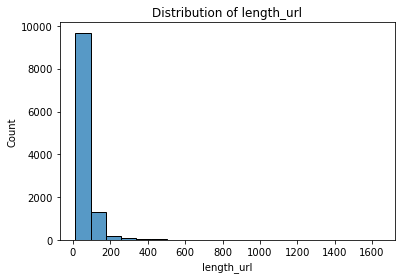

In [24]:
# Visualizing the distribution of length_url


sns.histplot(data=cleaned_data['length_url'],bins=20)
plt.title('Distribution of length_url')
plt.show()

In [25]:
# Finding outliers

from scipy.stats import iqr
iqr = iqr(cleaned_data['length_url'])
lower = np.quantile(cleaned_data['length_url'], 0.25) - 1.5 * iqr
upper = np.quantile(cleaned_data['length_url'], 0.75) + 1.5 * iqr


print(lower)
print(upper)

#showing outliers (3 in total)
outliers= cleaned_data[((cleaned_data['length_url'] < lower)) | (cleaned_data['length_url'] > upper)]

outliers

-24.0
128.0


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
29,163,14,1,4,9,1,0,2,0,1,0,0,0,3,0,1,0,2,0,0,1,0,0,0,1,0.398773,0.000000,0,0,1,0,0,3,0,0,0,0,0,0,17,14,1,3,1,18,7,18,8.000000,5.000000,8.400000,1,0,0,0,1,0,31,0.483871,0.516129,0,0,0,0.437500,0,0.625000,0,1,66.666667,0,100.0,0.0,0,0,0,0.000000,0,0,0,1,1,0,0,-1,0,0,1,0,0
45,131,27,0,2,1,0,1,0,0,1,4,0,0,7,0,3,0,0,0,0,0,0,0,0,0,0.030534,0.000000,0,0,0,0,0,2,1,0,1,0,1,0,14,6,1,2,1,40,10,40,7.428571,7.000000,7.545455,0,0,0,0,0,0,26,0.115385,0.884615,0,0,0,0.000000,0,0.086957,0,1,7.692308,0,0.0,0.0,0,0,0,0.000000,0,0,0,1,0,0,381,8019,0,0,1,4,0
49,159,14,1,2,0,0,1,1,0,2,0,0,0,8,0,1,0,1,0,0,0,0,0,0,1,0.270440,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,12,4,3,10,3,40,10,40,11.416667,10.000000,11.545455,0,0,0,0,0,0,13,0.923077,0.076923,0,0,0,1.000000,0,1.000000,0,0,100.000000,0,0.0,0.0,0,0,0,0.000000,0,0,0,1,1,0,325,1500,0,0,1,0,0
91,151,10,1,3,1,1,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,1,0,1,1,0.271523,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,6,10,3,7,3,110,7,110,22.666667,7.000000,25.800000,0,0,0,0,0,0,45,0.511111,0.488889,0,0,0,0.636364,0,0.636364,1,1,60.000000,0,100.0,0.0,0,0,0,10.000000,0,0,0,1,1,0,201,166,0,0,1,0,0
108,430,13,1,24,0,1,2,9,0,10,18,0,0,21,0,5,0,9,0,0,1,0,1,4,1,0.039535,0.769231,0,0,1,1,1,3,0,0,0,0,1,1,81,10,1,2,1,10,3,10,4.271605,2.500000,4.363636,3,0,0,1,0,2,21,0.428571,0.571429,0,3,0,0.000000,0,0.250000,1,1,0.000000,0,0.0,0.0,0,0,0,33.333333,0,0,0,1,1,1,0,-1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11365,267,25,0,3,0,0,1,1,0,2,0,0,0,5,0,1,0,1,0,0,0,1,0,0,1,0.123596,0.000000,0,0,1,0,0,3,0,0,0,0,0,0,9,6,2,9,2,200,11,200,27.444444,10.000000,32.428571,0,0,0,0,0,0,1,0.000000,1.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.0,100.0,0,0,0,0.000000,0,0,1,1,0,0,952,7083,17964,0,1,3,0
11383,139,17,1,2,0,0,1,4,0,5,0,0,4,3,0,1,0,4,0,0,0,0,0,0,0,0.273381,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,15,5,3,4,3,16,8,16,7.400000,6.000000,7.615385,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.0,0.0,0,0,0,0.000000,0,0,0,1,0,0,157,9338,21,0,0,5,0
11387,137,19,0,5,3,0,1,1,0,2,1,0,0,13,0,1,0,0,0,0,0,0,0,0,1,0.021898,0.000000,0,0,0,0,0,3,1,1,0,0,0,0,22,2,1,2,1,9,4,9,4.590909,3.333333,4.789474,6,0,0,0,0,0,13,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.0,0.0,0,0,0,100.000000,0,0,0,1,1,0,0,-1,0,0,1,0,0
11404,149,10,1,1,0,0,0,0,0,0,5,0,0,7,0,1,0,0,0,0,0,0,0,0,0,0.281879,0.000000,0,0,1,0,0,1,0,0,0,0,1,0,10,4,6,7,6,36,7,36,12.800000,7.000000,13.444444,0,0,0,0,0,0,5,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.0,0.0,0,0,0,100.0

In [26]:
print('There are ', outliers.shape[0], 'outliers for length_url in the dataset')

There are  616 outliers for length_url in the dataset


#### Observation: Some URLs have a length over 1000.  The histogram shows that the vast majority of values are in the low end of length. Based on a statistical formula, all values above a length of 128 are considered outliers. Further discussion needed to keep them or not.

#### Analyzing length hostname:

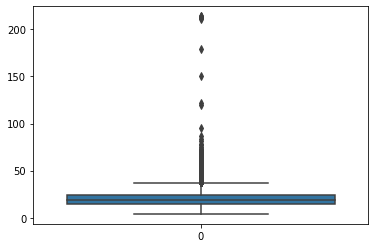

In [27]:
# Visualizing outliers with a Boxplot

hostname_length = cleaned_data['length_hostname']
sns.boxplot(data= hostname_length)
plt.show()

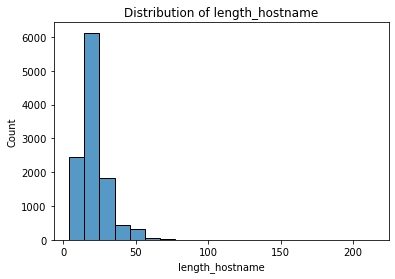

In [28]:
# Visualizing the distribution of length_hostname


sns.histplot(data=cleaned_data['length_hostname'],bins=20)
plt.title('Distribution of length_hostname')
plt.show()

#### Analyzing  nb_dots:

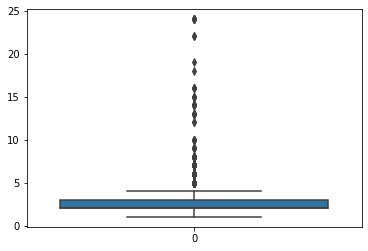

In [29]:
# Visualizing outliers with a Boxplot

hostname_length = cleaned_data['nb_dots']
sns.boxplot(data= hostname_length)
plt.show()

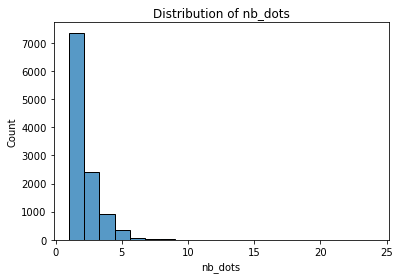

In [30]:
# Visualizing the distribution of nb_dots

sns.histplot(data=cleaned_data['nb_dots'],bins=20)
plt.title('Distribution of nb_dots')
plt.show()

#### Analyzing longest_words_raw

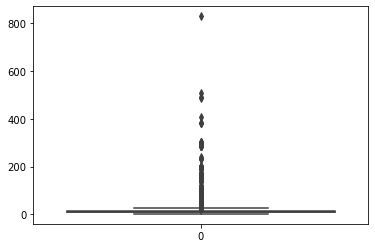

In [31]:
# Visualizing outliers with a Boxplot

hostname_length = cleaned_data['longest_words_raw']
sns.boxplot(data= hostname_length)
plt.show()

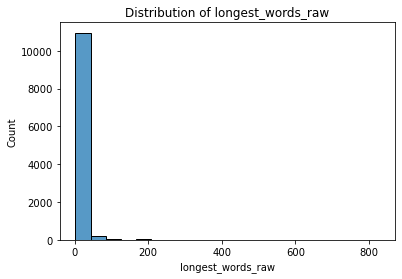

In [32]:
# Visualizing the distribution of  longest_words_raw

sns.histplot(data=cleaned_data['longest_words_raw'],bins=20)
plt.title('Distribution of longest_words_raw')
plt.show()

#### Observation: As for length_url there are also some rows with outliers for longest_words_raw, nb_dots and length_hostname. Further clarification is needed.

In [33]:
# Exporting example of outliers for url_length to Excel
# outliers.to_excel(r'outliers_url_length.xlsx')

In [34]:
# Exporting cleaned data to Excel

# cleaned_data.to_csv(r'phishing_dataset_cleaned.csv')

# Machine Learning Models

In [35]:
# Import our dependencies
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import pandas as pd
import tensorflow as tf

In [36]:
# Import our input dataset
original_df = pd.read_csv('archive/dataset_phishing_functionapplied.csv')
original_df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,1
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,0
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,0
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,1
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,1


#### Let's checkout the columns in the dataset

In [37]:
original_df.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

In [38]:
# Show all data types to make sure all data types are numeric and no categorical values are in the dataset
original_df.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 d

In [39]:
# Check again that all columns are numeric
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_or                       11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

### Separating and assigning features to X & y

In [40]:
# Separating & assigning features and target columns to X & y
y = original_df['status']
X = original_df.drop('status',axis=1)
X.shape, y.shape

((11430, 87), (11430,))

In [41]:
columns = X.columns
columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

In [42]:
X

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.00,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.00,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.000000,0,0,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.000000,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.40,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.000000,0,0,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.00,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.500000,0,0,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.00,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.000000,0,0,0,0,1,0,224,8175,8725,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,4,4,3,3,8,11,9,11,7.750000,6.00,9.500000,0,0,0,0,0,0,199,0.884422,0.115578,0,0,0,0.043478,0,0.173913,0,1,80.000000,0,21.052632,78.947368,0,0,0,0.000000,0,0,0,0,0,0,448,5396,3980,0,0,6
11426,84,18,0,5,0,1,1,0,0,1,0,0,1,5,0,1,0,0,0,1,1,1,0,0,1,0.023810,0.000000,0,0,1,0,0,3,0,0,0,0,1,0,12,3,3,3,3,10,10,8,5.166667,6.50,4.900000,0,0,0,0,0,0,3,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,0,0,211,6728,0,0,1,0
11427,105,16,1,2,6,0,1,0,0,1,1,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0.142857,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,13,5,1,3,1,15,8,15,6.153846,5.50,6.272727,0,1,0,0,0,0,68,0.470588,0.529412,0,5,0,0.000000,0,0.000000,0,1,6.250000,0,0.000000,0.000000,0,0,0,80.000000,0,0,0,0,0,0,2809,8515,8,0,1,10
11428,38,30,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,22,22,0,12.500000,12.50,0.000000,0,0,0,0,0,0,32,0.375000,0.625000,0,1,0,0.050000,0,0.050000,0,1,16.666667,0,0.000

In [43]:
# This should be the status of the urls' in where legitimate = 1 and phishing = 0
y

0        1
1        0
2        0
3        1
4        1
        ..
11425    1
11426    0
11427    1
11428    1
11429    0
Name: status, Length: 11430, dtype: int64

In [44]:
# Shuffle the rows to prepare for splitting and training the test set

# Shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
original_df = original_df.sample(frac=1).reset_index(drop=True)
original_df.head(10)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,45,14,0,2,0,0,0,0,0,0,0,0,1,4,0,1,0,0,0,1,1,0,0,0,0,0.044444,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,5,3,3,3,6,7,6,7,5.800000,4.500000,6.666667,0,1,0,0,0,0,346,0.988439,0.011561,0,0,0,0.750000,0,0.000000,0,0,50.000000,0,98.333333,1.666667,0,0,0,96.153846,0,0,0,0,0,0,1051,5157,114,0,1,8,1
1,40,23,0,3,1,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.075000,0.130435,0,0,0,0,0,3,1,0,0,0,0,0,5,1,3,4,3,8,8,5,5.000000,5.666667,4.000000,1,0,0,0,0,0,13,0.846154,0.153846,0,0,0,0.000000,0,0.000000,0,0,60.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,1,1,0,289,75,0,0,1,0,0
2,35,17,0,1,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0.085714,0.176471,0,0,0,0,0,1,0,0,0,0,0,0,3,3,3,13,3,13,13,5,7.000000,13.000000,4.000000,0,0,0,0,1,0,23,0.000000,1.000000,0,0,0,0.043478,0,0.043478,0,1,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,1,0,126,240,0,0,1,0,0
3,67,23,0,3,1,0,0,0,0,0,0,0,0,6,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,1,0,0,0,0,0,8,5,2,3,2,15,15,7,6.125000,9.000000,5.166667,2,0,0,0,0,0,1,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,0,0,355,5123,0,0,1,2,0
4,24,16,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,2,4,3,3,0,8,8,0,5.500000,5.500000,0.000000,0,0,0,0,0,0,144,0.972222,0.027778,0,1,0,0.000000,0,0.000000,0,1,66.666667,0,100.000000,0.000000,0,0,1,100.000000,0,0,0,0,0,0,7,4011,3283858,0,0,2,1
5,59,31,0,4,1,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,3,1,0,0,0,0,0,7,1,3,5,3,12,12,5,5.571429,7.666667,4.000000,0,0,0,0,0,0,11,0.909091,0.090909,0,0,0,0.000000,0,1.000000,0,0,100.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,1,0,0,2032,8195,8063233,0,1,4,0
6,28,19,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,2,3,3,3,0,11,11,0,7.000000,7.000000,0.000000,0,0,0,0,0,0,120,0.916667,0.083333,0,0,0,0.100000,0,0.200000,0,1,73.684211,0,95.652174,4.347826,0,0,0,0.000000,0,0,0,1,1,0,283,4099,3331221,0,0,2,1
7,21,12,0,1,1,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,1,1,0,0,0,0,0,2,0,3,3,0,5,5,0,4.000000,4.000000,0.000000,0,0,0,0,0,0,104,0.423077,0.576923,0,5,0,0.016667,0,0.016667,0,1,13.636364,0,27.272727,72.727273,0,0,0,62.500000,0,0,0,0,1,1,0,44,3169370,0,0,2,1
8,48,28,0,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,3,1,3,24,3,24,24,7,11.333333,24.000000,5.000000,0,0,0,0,0,0,7,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,0,0,177,-1,0,0,1,0,0
9,72,14,0,2,3,0,0,0,0,0,0,0,0,6,0,1,0,0,0,0,1,0,0,0,1,0.027778,0.142857,0,0,0,0,1,2,1,1,0,0,3,0,9,3,2,2,2,11,3,11,5.888889,2.666667,7.500000,0,1,0,0,0,0,99,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.000000,0,0,0,0

In [45]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=78, stratify=y) # random_state was originally 42

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
# examine the result of StandardScaler
X_train_scaled

array([[-0.67124663, -0.56512792, -0.42080758, ..., -0.14330483,
        -1.07011499,  0.3220589 ],
       [ 0.05133983,  0.82561276, -0.42080758, ..., -0.14330483,
        -1.07011499,  0.3220589 ],
       [ 0.28618043, -0.47241188, -0.42080758, ..., -0.14330483,
        -1.07011499,  0.71644504],
       ...,
       [ 0.08746915, -0.37969583, -0.42080758, ..., -0.14330483,
        -1.07011499, -0.07232723],
       [ 0.59327967,  0.64018067,  2.37638302, ..., -0.14330483,
         0.93447901, -0.46671336],
       [-0.58092332, -0.28697979, -0.42080758, ..., -0.14330483,
         0.93447901, -1.25548563]])

# Logistic Regression

# Random Forest Classifier

Random Forest classifier is a type of ensemble learning model combines multiple smaller models into a more robust and accurate model. Random Forest Models use a number of weak learner algorithms (such as decision trees) and combines their output to make a final classification decision. They are very similar to their neural networks counterparts. Random forest models are the most commonly used model because of their robustness and scalability. Both output and feature selection of random forest models are easy to interpret and they can easily handle outliers and nonlinear data.

Random forest algorithms are very beneficial because they:
- are robust against overfitting as all of those weak learners are trained on different pieces of the data
- can be used to rank the importance of input values in a natural way.
- can handle thousands of input variables without variable deletion.
- are robust to outliers and nonlinear data. 
- run efficiently using large datasets.

##### n=128 estimators is the largest value of estimators we would use in a model. To create our random forest classifier model and test the performance, the following code is required:

In [48]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# max_depth, min_samples_split, max_features

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.980


## Observation: The test size of the data was separated 50% and it gave us a higher accuracy this way. 98% compared to 96%. See below for the random forest classifier accuracy.

In [49]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[25,  0],
       [ 1, 24]], dtype=int64)

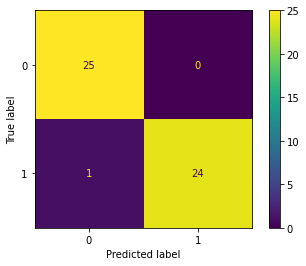

In [50]:
# Display confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
display.plot()
# plt.savefig("archive/rfmodel_confusion_matrix_best.png")
plt.show()

### Confusion Matrix Analysis:

The real risk (downside) is when a phishing url is labeled as legitimate. That is the top right quadrant of the image above. This means it has created a false positive.

There is also opportunity loss when a legitimate url is labeled as phishing. That is the bottom left quadrant of the image above. This means it has created a false negative.

Top left quadrant (or the True Positive) are urls are that actually phishing. Bottom right quadrant (or the True Negative) are urls that actually legitimate.

### What makes a good Confusion Matrix?

Good Confusion Matrix = FP < FN.

What does this mean?

This would mean that the user would rather have Legitimate URLs that are accidentally labeled as Phishing (Higher FN) & there would be less Phishing URLs that are accidentally labeled as Legitimate (Lower FP).

In [51]:
# print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        25

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [52]:
# create feature importances from model
importances = rf_model.feature_importances_

# get column names
columns = columns

# create a dataframe
feature_importances_df = pd.DataFrame({
    'feature': columns,
    'importance': importances
}) 


feature_importance = feature_importances_df.sort_values(by=['importance'], ascending=False, inplace=True)
feature_importance = feature_importances_df.reset_index(drop=True, inplace=True)
feature_importance = feature_importances_df.head(10)
feature_importance

,feature,importance
0,google_index,0.178336
1,page_rank,0.114348
2,nb_hyperlinks,0.071792
3,web_traffic,0.067170
4,ratio_extHyperlinks,0.036076
5,nb_www,0.033349
6,domain_age,0.032987
7,longest_word_path,0.029428
8,phish_hints,0.028287
9,ratio_intHyperlinks,0.023376


In [53]:
# We can sort all the features by their importance.
sorted(zip(rf_model.feature_importances_, columns), reverse=True)

[(0.17833619552142568, 'google_index'),
 (0.11434808551666943, 'page_rank'),
 (0.07179175468120413, 'nb_hyperlinks'),
 (0.06717024703965274, 'web_traffic'),
 (0.03607575693598954, 'ratio_extHyperlinks'),
 (0.0333487116005166, 'nb_www'),
 (0.03298684095240041, 'domain_age'),
 (0.02942846791974181, 'longest_word_path'),
 (0.028286916785011062, 'phish_hints'),
 (0.023376454864731055, 'ratio_intHyperlinks'),
 (0.02112646104299312, 'ratio_digits_url'),
 (0.02092327109052522, 'ratio_extRedirection'),
 (0.018963178740635092, 'links_in_tags'),
 (0.01827993942174275, 'length_url'),
 (0.01759159054716651, 'safe_anchor'),
 (0.01591202973874756, 'length_hostname'),
 (0.015456006426543541, 'length_words_raw'),
 (0.014758730902783157, 'longest_words_raw'),
 (0.014491186520269528, 'domain_in_title'),
 (0.013742816887846468, 'avg_word_path'),
 (0.01319314815386764, 'char_repeat'),
 (0.012954072444177518, 'ratio_digits_host'),
 (0.01288674066794157, 'nb_dots'),
 (0.011783054866140246, 'shortest_word_ho

In [54]:
feature_importance['feature']

0           google_index
1              page_rank
2          nb_hyperlinks
3            web_traffic
4    ratio_extHyperlinks
5                 nb_www
6             domain_age
7      longest_word_path
8            phish_hints
9    ratio_intHyperlinks
Name: feature, dtype: object

Text(0.5, 1.0, 'Top Ten Feature Importances')

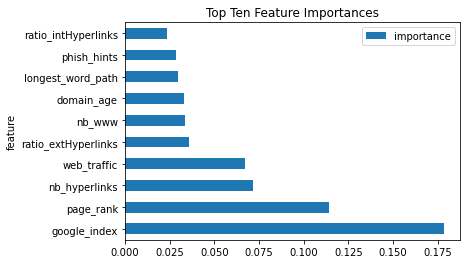

In [55]:
# visualize the top ten feature-importances_

feature_importance.plot.barh(x="feature", y="importance")
plt.title("Top Ten Feature Importances")
# plt.savefig("archive/rf_feature_importance.png")

## Deep Learning Model

Here we test out dataset with a deep learning model to compare with the random forest classifier

In [56]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# this is done using the classes within the Keras module
number_input_features = X_train.shape[1]
hidden_nodes_layer1 = (number_input_features * 3)
hidden_nodes_layer2 = (number_input_features * 1)
hidden_nodes_layer3 = (number_input_features * 0.50)

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="sigmoid")
)

# third hidden layer
nn.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3,
    activation="sigmoid"
))

# Output layer
nn.add(tf.keras.layers.Dense(
    units=1, 
    activation="sigmoid"
))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 261)               22968     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                22794     
_________________________________________________________________
dense_2 (Dense)              (None, 43)                3784      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 44        
Total params: 49,590
Trainable params: 49,590
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [58]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Train on 11380 samples
Epoch 1/50
11380/11380 [==============================] - 2s 147us/sample - loss: 0.2745 - accuracy: 0.8895
Epoch 2/50
11380/11380 [==============================] - 1s 96us/sample - loss: 0.1563 - accuracy: 0.9447
Epoch 3/50
11380/11380 [==============================] - 1s 113us/sample - loss: 0.1507 - accuracy: 0.9452
Epoch 4/50
11380/11380 [==============================] - 1s 114us/sample - loss: 0.1462 - accuracy: 0.9480
Epoch 5/50
11380/11380 [==============================] - 1s 120us/sample - loss: 0.1421 - accuracy: 0.9485
Epoch 6/50
11380/11380 [==============================] - 1s 112us/sample - loss: 0.1390 - accuracy: 0.9499
Epoch 7/50
11380/11380 [==============================] - 1s 117us/sample - loss: 0.1365 - accuracy: 0.9504
Epoch 8/50
11380/11380 [==============================] - 1s 117us/sample - loss: 0.1322 - accuracy: 0.9503
Epoch 9/50
11380/11380 [==============================] - 1s 120us/sample - loss: 0.1313 - accuracy: 0.9506
Epoch 

In [59]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

50/50 - 0s - loss: 0.1152 - accuracy: 0.9800
Loss: 0.11522267115302384, Accuracy: 0.9800000190734863


<AxesSubplot:>

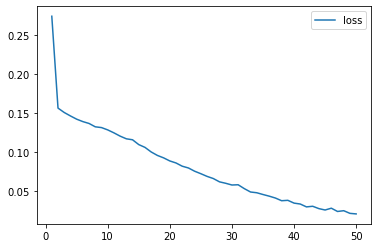

In [60]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

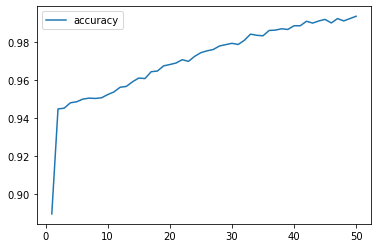

In [61]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Model Assessment:

According to the accuracy metric of the neural network model was able to correctly classify about 98%

Loss: 0.11522267115302384, Accuracy: 0.9800000190734863

## Use a Different Activation Function

It is important to use an activation function that matches the complexity of the input data. If we wanted to rank the four most-used activation functions by data complexity and ideal use case, the order would be as follows:

- The sigmoid function values are normalized to a probability between 0 and 1, which is ideal for binary classification (like our output classification)
- The tanh function can be used for classification or regression, and it expands the range between -1 and 1.
- The ReLU function is ideal for looking at positive nonlinear input data for classification or regression.
- The Leaky ReLU function is a good alternative for nonlinear input data with many negative inputs.

In [62]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# this is done using the classes within the Keras module
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  50
hidden_nodes_layer2 = 25
hidden_nodes_layer3 = 30

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="sigmoid")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="sigmoid")
)

# third hidden layer
nn_new.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3,
    activation="sigmoid"
))

# Output layer
nn_new.add(tf.keras.layers.Dense(
    units=1, 
    activation="sigmoid"
))

# Check the structure of the model
nn_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                4400      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                780       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 6,486
Trainable params: 6,486
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Compile the Sequential model together and customize metrics
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model_new = nn_new.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 11380 samples
Epoch 1/50
11380/11380 [==============================] - 2s 148us/sample - loss: 0.3535 - accuracy: 0.8689
Epoch 2/50
11380/11380 [==============================] - 1s 113us/sample - loss: 0.1590 - accuracy: 0.9446 - loss: 0.1595 - accuracy: 0.94
Epoch 3/50
11380/11380 [==============================] - 1s 98us/sample - loss: 0.1499 - accuracy: 0.9478
Epoch 4/50
11380/11380 [==============================] - 1s 106us/sample - loss: 0.1441 - accuracy: 0.9482
Epoch 5/50
11380/11380 [==============================] - 1s 106us/sample - loss: 0.1416 - accuracy: 0.9509
Epoch 6/50
11380/11380 [==============================] - 1s 97us/sample - loss: 0.1378 - accuracy: 0.9516
Epoch 7/50
11380/11380 [==============================] - 1s 104us/sample - loss: 0.1355 - accuracy: 0.9523
Epoch 8/50
11380/11380 [==============================] - 1s 97us/sample - loss: 0.1324 - accuracy: 0.9531
Epoch 9/50
11380/11380 [==============================] - 1s 97us/sample - loss: 0.1

<AxesSubplot:>

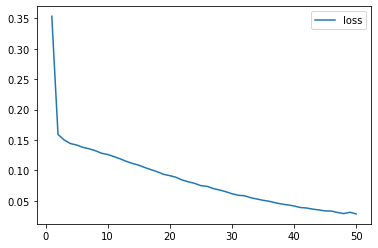

In [64]:
# Create a DataFrame containing training history
history_new_df = pd.DataFrame(fit_model_new.history, index=range(1,len(fit_model_new.history["loss"])+1))

# Plot the loss
history_new_df.plot(y="loss")

<AxesSubplot:>

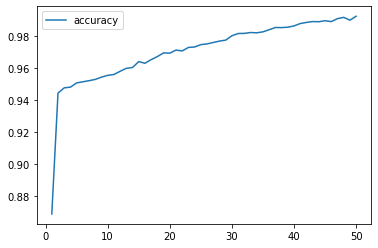

In [65]:
# Plot the accuracy
history_new_df.plot(y="accuracy")

## Model Assessment:

According to the accuracy metric of the neural network model was only able to correctly classify about 98% (huge improvement from Segment 2 submission ML code)

Loss: 0.053311817497014996, Accuracy: 0.9800000190734863

## Model Performance Comparison:

Both optimized deep learning model and the random forest model were able to predict whether or not a url is phishing with an accuracy rate above 90%. 

Although they both performed comparably, the implementation and training times were not the same. The random forest classifier was able to train using the large dataset and predict the values within a few seconds, while the deep learning model required more than a few minutes to train on 11430 data points required. 

The random forest model is able to achieve comparable accuracy on large tabular data with a lot less code and with faster performance. The decision on whether to use random forest classifier versus the deep learning model comes down to preference. 

Since our Phishing Detection dataset is tabular, the Random Forest Classifier is the recommended model based on performance, speed, explainability and simplicity of setup.

In [66]:
## Another model to try: Gradient Boosting Classifier